# Introdução

## Descrição 
Uma Montadora de Veículos Automotivos busca desenvolver um Modelo de Machine Learning para aprimorar as decisões de crédito de sua financeira. O objetivo principal é reduzir a inadimplência, potencializar os lucros e aprimorar a identificação de clientes de qualidade. Esse modelo visa equilibrar riscos e retornos, ampliando o giro dos produtos, gerando receita com os dividendos da concessão de crédito e garantindo uma operação mais segura e rentável. A meta é que o Modelo Consiga atingir uma acurácia de ao menos 80% generalizando bem para ambas as classes de clientes.

In [1]:
#Bibliotecas Necessárias
from funcoes import *
from utilidades import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 10,4

In [2]:
#Busca os dados diretamente de banco de dados relacional
df = fetch_data_from_db(const.consulta_sql)
df

Função fetch_data_from_db executada em 1.69 segundos 


,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.00,350000.00,bom
1,Empresário,21,46557.0,Outros,Ens.Médio,MuitoBom,37.0,2,Víuvo,EcoPrestige,126855.00,500000.00,bom
2,Dentista,13,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.00,320000.00,ruim
3,Engenheiro,10,37262.0,Própria,Superior,Baixo,35.0,0,Divorciado,AgileXplorer,28767.00,250000.00,bom
4,Contador,6,52606.0,Própria,PósouMais,Justo,27.0,0,Casado,TrailConqueror,199564.00,400000.00,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Médico,36,47480.0,Própria,Superior,Bom,64.0,0,Divorciado,SpeedFury,217011.00,800000.00,bom
146,Advogado,39,20860.0,Alugada,Ens.Fundamental,Bom,37.0,0,Víuvo,DoubleDuty,139244.00,320000.00,ruim
147,Arquiteto,26,31394.0,Própria,PósouMais,MuitoBom,53.0,1,Divorciado,ElegantCruise,107035.00,300000.00,ruim
148,Médico,19,39769.0,None,Ens.Médio,Baixo,64.0,0,Solteiro,VoyageRoamer,54520.00,350000.00,bom


In [4]:
df.to_csv("novadrive_df.csv", index=False)

In [40]:
#Conversão de Tipos
df["valorsolicitado"] = df["valorsolicitado"].astype(float)
df["valortotalbem"] = df["valortotalbem"].astype(float)

### Informações e resumos dos dados

***Os dados já foram explorados através do arquivo exploratoria.py. E Algumas inconsistências foram encontradas como dados faltantes, outliers e erros de digitação.
Para uma abordagem mais direta e rápida foram criadas funções específicas para um tratamento rápido e eficiente dos dados. Com essas dunções também será possível tratar os dados na criação da aplicação web streamlit.***

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profissao        147 non-null    object 
 1   tempoprofissao   150 non-null    int64  
 2   renda            150 non-null    float64
 3   tiporesidencia   147 non-null    object 
 4   escolaridade     150 non-null    object 
 5   score            150 non-null    object 
 6   idade            150 non-null    float64
 7   dependentes      150 non-null    int64  
 8   estadocivil      150 non-null    object 
 9   produto          150 non-null    object 
 10  valorsolicitado  150 non-null    float64
 11  valortotalbem    150 non-null    float64
 12  classe           150 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 15.4+ KB


In [42]:
df.isnull().sum()

profissao          3
tempoprofissao     0
renda              0
tiporesidencia     3
escolaridade       0
score              0
idade              0
dependentes        0
estadocivil        0
produto            0
valorsolicitado    0
valortotalbem      0
classe             0
dtype: int64

## Tratamento e Visualização dos dados

In [43]:
df = substitui_nulos(df)
df.isnull().sum()

Função substitui_nulos executada em 0.01 segundos 


profissao          0
tempoprofissao     0
renda              0
tiporesidencia     0
escolaridade       0
score              0
idade              0
dependentes        0
estadocivil        0
produto            0
valorsolicitado    0
valortotalbem      0
classe             0
dtype: int64

In [44]:
print(df["profissao"].unique())

['Cientista de Dados' 'Empresário' 'Dentista' 'Engenheiro' 'Contador'
 'Arquiteto' 'Programador' 'Advogado' 'Adv.' 'Médico' 'Dent.']


***Há algumas inconsistências nos dados. Adv. e Dent. são provavelmente abreviações para Advogado e Dentista, respectivamente. E essas inconsistências podem comprometer o desempenho do modelo***
- **A função "corrigir_erros_digitacao" foi desenvolvida com o propósito de corrigir esse erro, atribuindo-os á seus valores mais próximos.**

In [45]:
profissoes_validas = ['Cientista de Dados', 'Empresário', 'Dentista', 'Engenheiro', 'Contador',
 'Arquiteto', 'Programador', 'Advogado', 'Médico' ]

In [46]:
#Uso da função para correção de erros de digitação
df = corrigir_erros_digitacao(df, "profissao", profissoes_validas)
df.groupby(by="profissao").size()

Função corrigir_erros_digitacao executada em 0.00 segundos 


profissao
Advogado              12
Arquiteto             15
Cientista de Dados    15
Contador               9
Dentista              22
Empresário            27
Engenheiro            18
Médico                12
Programador           20
dtype: int64

In [47]:
df.describe()

,tempoprofissao,renda,idade,dependentes,valorsolicitado,valortotalbem
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,6690.573333,36406.813333,48.086667,0.980000,144512.680000,375161.993333
std,81647.612861,12974.282533,20.056945,0.993063,113913.175165,178933.034924
min,0.000000,7814.000000,22.000000,0.000000,28290.000000,31170.000000
25%,13.000000,24271.750000,36.000000,0.000000,69172.000000,280000.000000
50%,24.000000,35795.000000,47.000000,1.000000,123258.000000,320000.000000
75%,32.750000,46361.000000,58.000000,2.000000,170513.750000,400000.000000
max,999999.000000,59976.000000,225.000000,4.000000,800000.000000,800000.000000


***Como podemos ver há alguns valores discrepantes em idade e tempo de profissão***

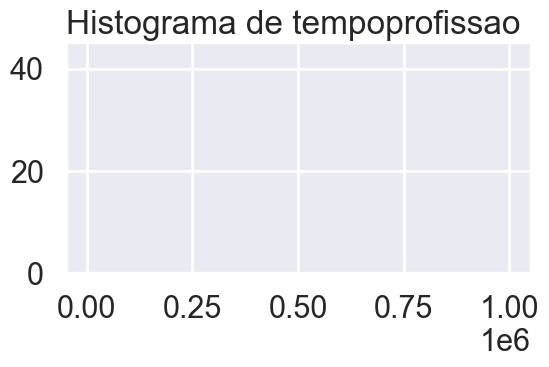

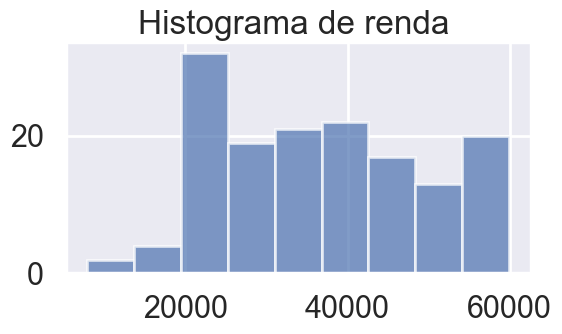

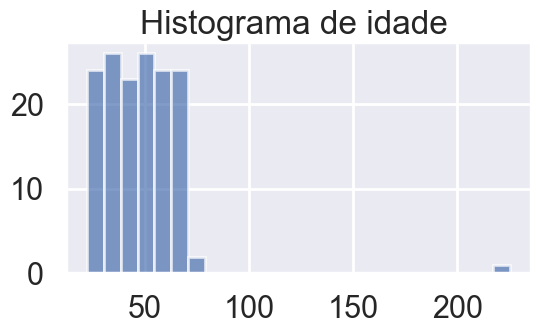

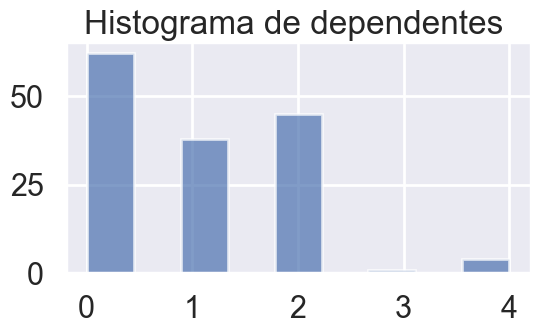

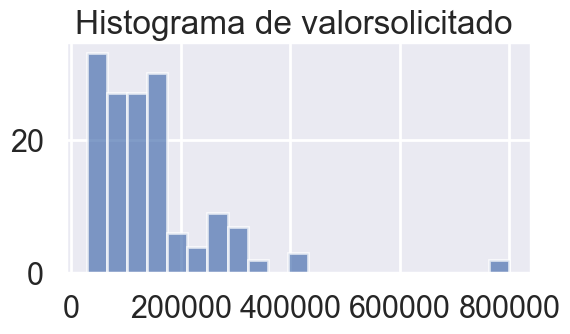

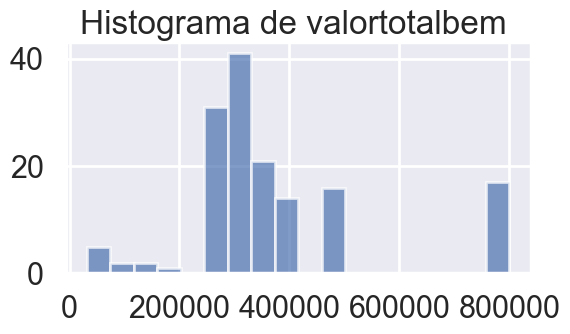

In [48]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        plt.subplots(figsize=(6,3))
        plt.hist(data=df, x=col, alpha=0.7, bins="auto")
        plt.title(f"Histograma de {col} ")
        plt.show()    

In [49]:
#Função para tratamento de outliers
df = tratar_outliers(df, "idade", 17, 110)
df = tratar_outliers(df, "tempoprofissao", 0, 70)
df.head(5)

Função tratar_outliers executada em 0.00 segundos 
Função tratar_outliers executada em 0.00 segundos 


,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24.0,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.0,350000.0,bom
1,Empresário,21.0,46557.0,Outros,Ens.Médio,MuitoBom,37.0,2,Víuvo,EcoPrestige,126855.0,500000.0,bom
2,Dentista,13.0,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.0,320000.0,ruim
3,Engenheiro,10.0,37262.0,Própria,Superior,Baixo,35.0,0,Divorciado,AgileXplorer,28767.0,250000.0,bom
4,Contador,6.0,52606.0,Própria,PósouMais,Justo,27.0,0,Casado,TrailConqueror,199564.0,400000.0,ruim


In [50]:
#Criação de novos atributos
df["proporcao_solicitado"] = df["valorsolicitado"] / df["valortotalbem"] 
df["proporcao_solicitado"] = df["proporcao_solicitado"].astype(float)

In [51]:
#Separação das colunas
colunas_categoricas = ['profissao', 'tiporesidencia', 'escolaridade', 'score', 'estadocivil', 'produto']
colunas_numericas = ['tempoprofissao', 'renda', 'idade', 'dependentes', 'valorsolicitado', 'valortotalbem', 'proporcao_solicitado']

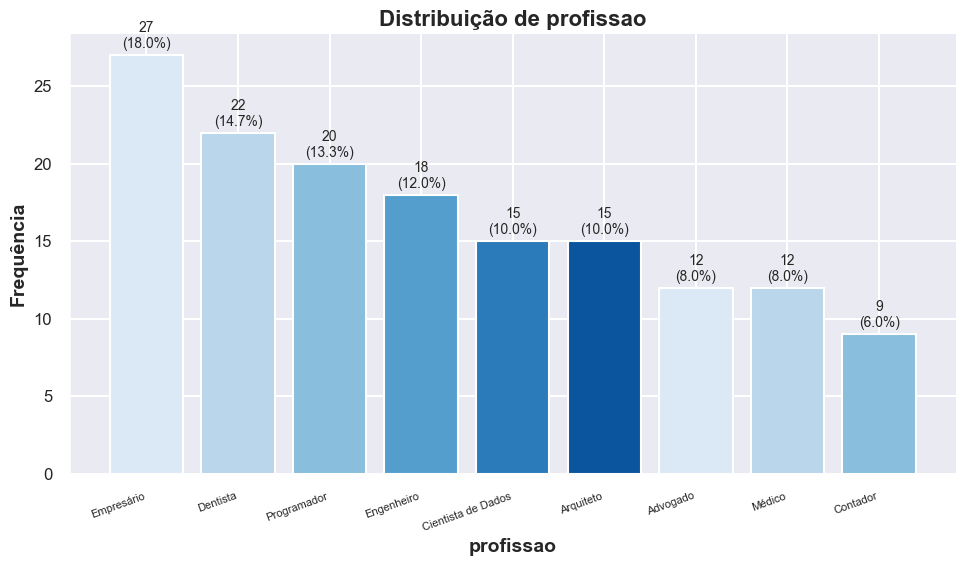

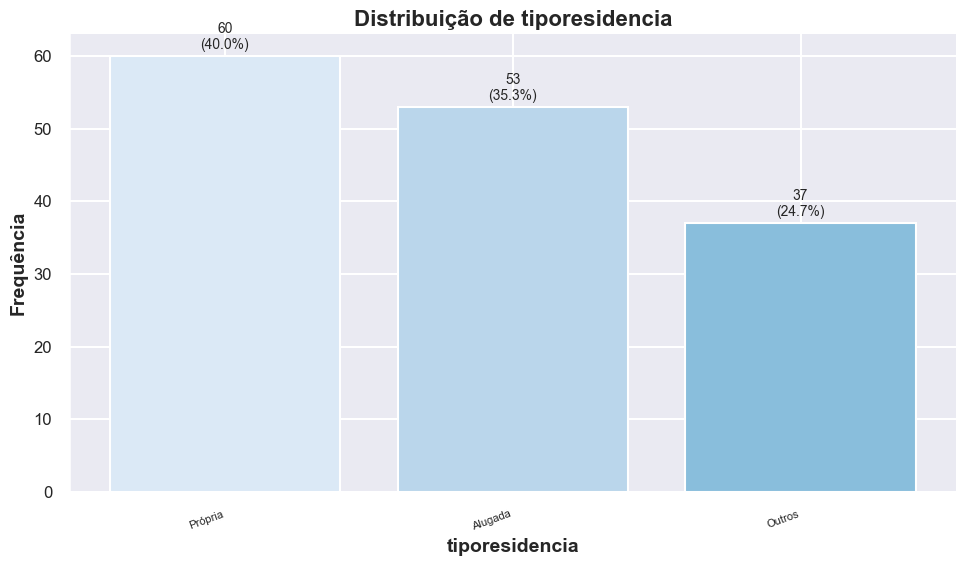

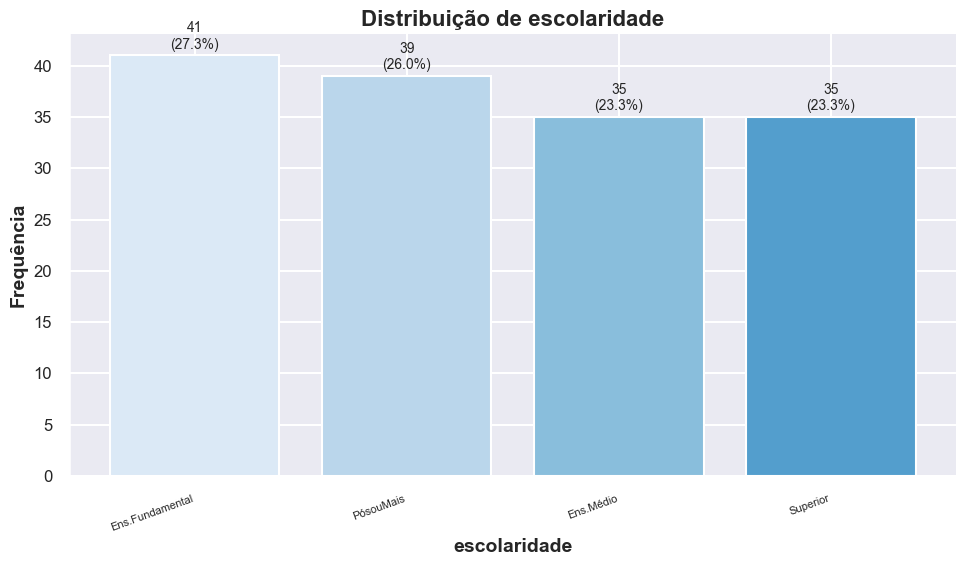

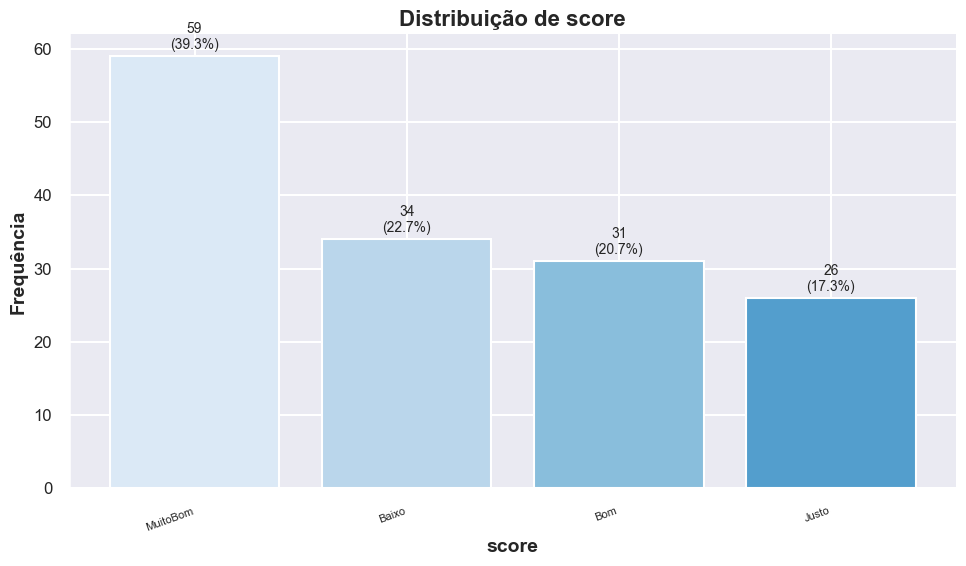

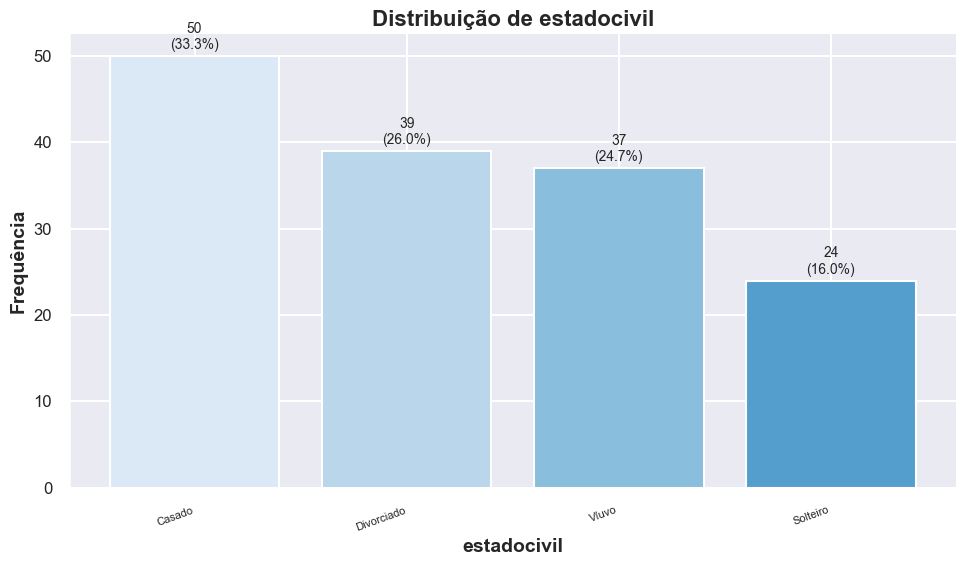

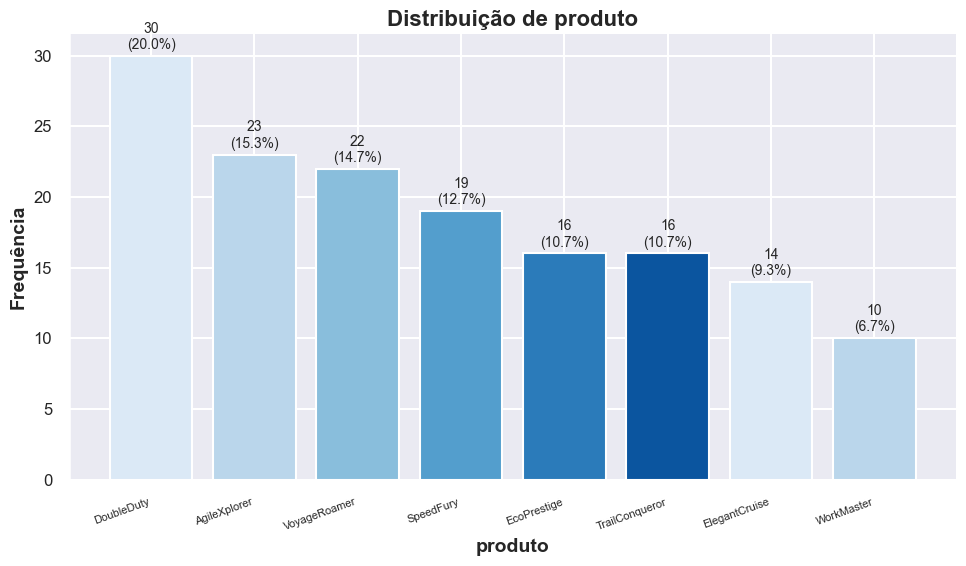

Função plot_bars executada em 6.03 segundos 


In [52]:
#Gráficos de Barras
plot_bars(df, colunas_categoricas, "Blues")

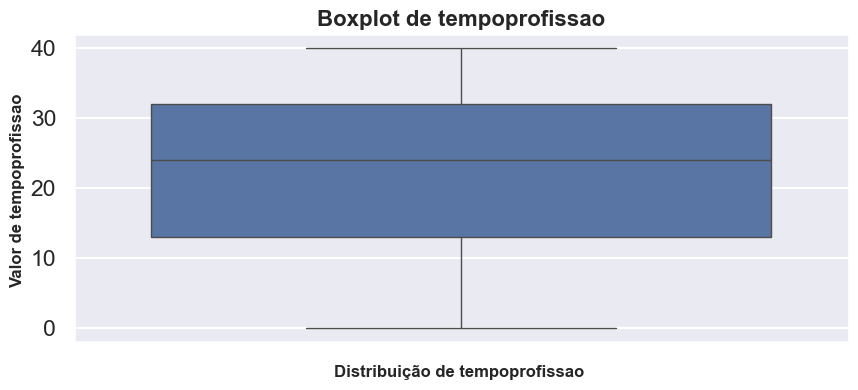

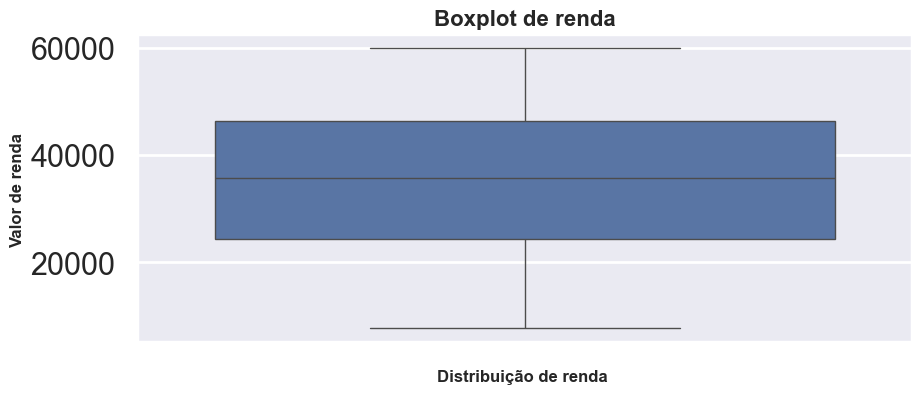

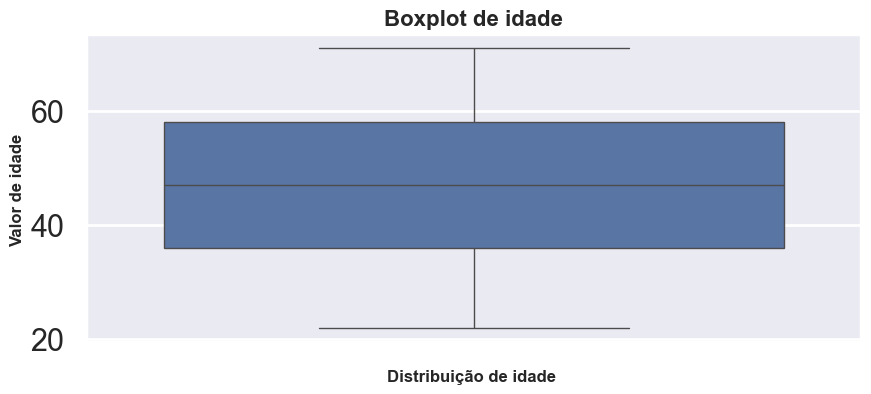

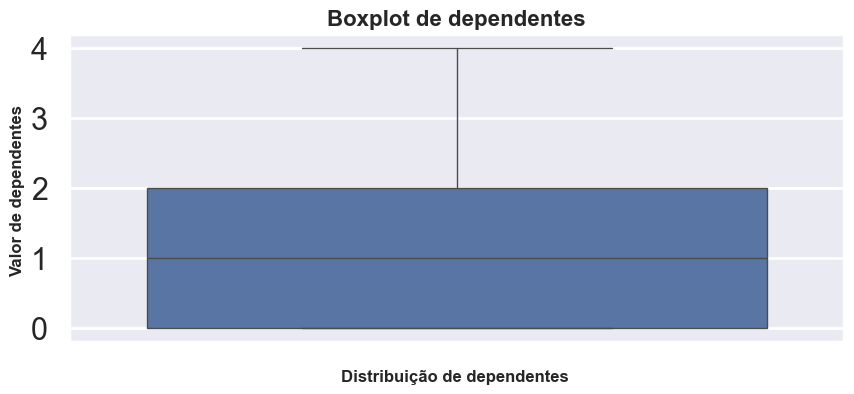

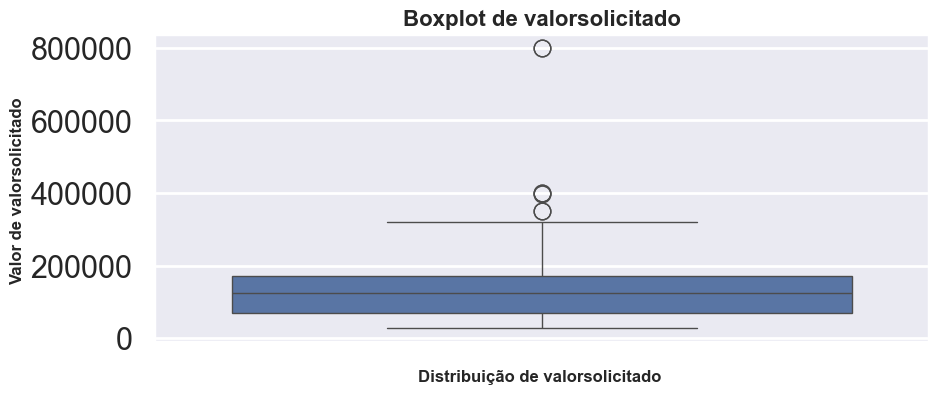

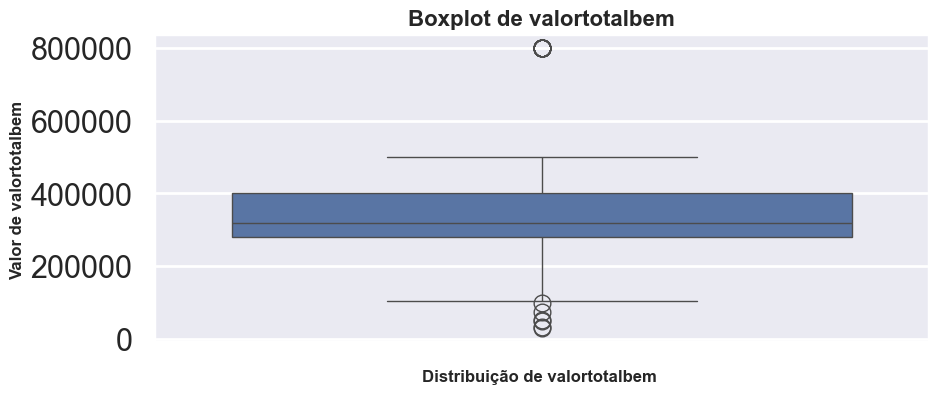

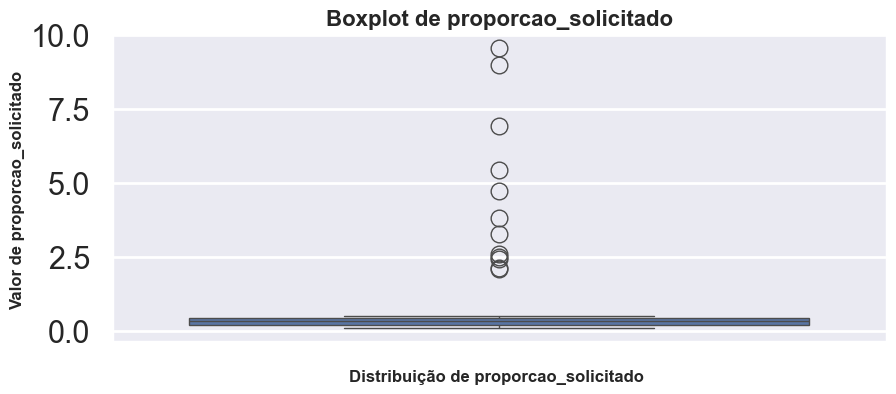

Função plot_boxplot executada em 1.43 segundos 


In [53]:
#Boxplots
plot_boxplot(df, colunas_numericas)

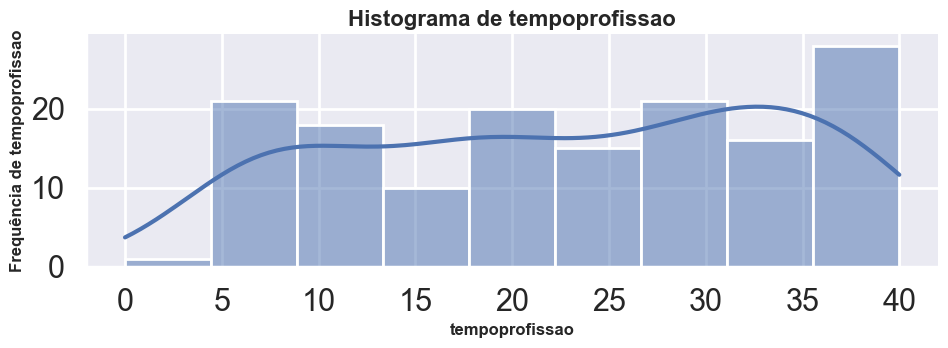

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Função plot_hist executada em 1.00 segundos 


In [54]:
#Histogramas
plot_hist(df, colunas_numericas)

In [55]:
#Resumos Estatísticos
df.describe()

,tempoprofissao,renda,idade,dependentes,valorsolicitado,valortotalbem,proporcao_solicitado
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,22.900000,36406.813333,46.900000,0.980000,144512.680000,375161.993333,0.645809
std,11.114867,12974.282533,13.813596,0.993063,113913.175165,178933.034924,1.363126
min,0.000000,7814.000000,22.000000,0.000000,28290.000000,31170.000000,0.101036
25%,13.000000,24271.750000,36.000000,0.000000,69172.000000,280000.000000,0.211656
50%,24.000000,35795.000000,47.000000,1.000000,123258.000000,320000.000000,0.336752
75%,32.000000,46361.000000,58.000000,2.000000,170513.750000,400000.000000,0.443156
max,40.000000,59976.000000,71.000000,4.000000,800000.000000,800000.000000,9.560515
